In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train_data = pd.read_csv('/content/drive/My Drive/Train(1).csv', index_col = ['Applicant_ID'])

In [ ]:
test_data = pd.read_csv('/content/drive/My Drive/Test(1).csv', index_col = ['Applicant_ID'])

In [ ]:
train_data.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,53471.000000,52156.000000,55645.000000,55645.000000,55645.000000,4.264000e+04,5.083700e+04,4.264000e+04,4.799200e+04,5.564500e+04,2.457900e+04,4.610500e+04,5.011100e+04,5.600000e+04,3.352500e+04,42964.000000,44849.000000,45598.000000,55996.000000,55645.000000,40146.000000,35600.000000,27877.000000,42703.000000,50550.000000,48562.000000,46701.000000,55645.000000,55645.000000,30491.000000,16592.000000,50550.000000,54744.000000,55645.000000,32852.000000,54005.000000,50550.000000,55645.000000,51789.000000,12271.000000,17771.000000,54677.000000,55432.000000,50617.000000,24683.000000,40096.000000,3.511100e+04,55645.000000,4.494400e+04
mean,3491.795665,0.550737,1.052225,0.851979,1.956317,6.244479e+05,6.865210e+06,2.626690e+06,1.316002e+07,1.185585e+07,2.054715e+06,2.771113e+06,6.009944e+06,6.914875e+07,1.145041e+08,0.230425,0.265692,0.271832,0.948800,1.031593,86.500380,6628.316381,6452.875072,104.558516,2624.555935,10106.554899,6190.516948,17274.315141,16518.540695,5213.246663,10857.565755,938.345321,13.926583,0.230245,0.199866,12.859069,8.480435,8.601420,0.090849,147.797977,108.117363,0.368215,6.634511,0.563377,0.072520,0.095371,3.052449e+05,1.049061,6.005862e+05
std,188.462426,0.820979,2.147768,3.157692,10.512396,1.433422e+06,1.912729e+07,3.927355e+06,1.977963e+07,2.669459e+07,4.912980e+06,4.544838e+06,2.335893e+07,2.713995e+09,1.153842e+08,0.621833,0.720198,0.725434,1.736454,1.785122,53.445528,5661.059297,5739.968774,436.670719,1964.226548,8796.472481,5390.915344,26930.742020,9666.183962,3124.491488,6049.678489,1044.597044,15.208396,0.683063,0.574002,10.621984,9.328810,7.969215,0.423802,45.085889,36.765769,0.412858,6.378946,0.196973,0.291146,0.335210,1.647757e+06,1.806160,5.842405e+06
min,2990.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.395430e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.255000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.166600,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.021000,0.000000,0.000000,0.000000,0.048528,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,3358.000000,0.070788,0.000000,0.000000,0.000000,1.400400e+04,6.869740e+05,1.929440e+05,1.368502e+06,4.500730e+05,2.172565e+05,2.758010e+05,1.921660e+05,1.657646e+07,5.007636e+07,0.000000,0.000000,0.000000,0.000000,0.000000,40.305000,1068.667500,797.145000,14.865000,1231.500000,3375.000000,2068.000000,60.000000,9765.000000,2312.000000,6297.000000,194.000000,2.333400,0.000000,0.000000,6.000000,2.000000,4.000000,0.000000,136.191750,87.055500,0.000000,2.020000,0.411672,0.000000,0.000000,7.710079e+01,0.000000,4.560141e-02
50%,3484.000000,0.267575,0.062000,0.000000,0.000000,1.155330e+05,2.704328e+06,9.639420e+05,5.506295e+06,3.707559e+06,6.986440e+05,1.163110e+06,1.605792e+06,2.814143e+07,8.442428e+07,0.000000,0.000000,0.000000,0.000000,0.000000,89.167500,5976.225000,5548.935000,60.660000,2203.500000,8214.000000,5110.000000,486.000000,15057.000000,5658.000000,10584.000000,598.000000,7.833400,0.000000,0.000000,10.000000,6.000000,6.000000,0.000000,150.000000,118.441500,0.220000,5.050000,0.588648,0.000000,0.000000,3.181243e+02,0.000000,1.703996e-01
75%,3620.000000,0.719512,1.282000,0.000000,0.000000,5.259280e+05,6.993831e+06,3.751516e+06,1.694552

In [ ]:
train_data.shape

(56000, 51)

In [ ]:
test_data.shape

(24000, 50)

In [ ]:
train_data.head(10)

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field47,form_field48,form_field49,form_field50,default_status
Applicant_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Apcnt_1000000,3436.0,0.28505,1.6560,0.0,0.0000,0.0,10689720.0,252072.0,4272776.0,11333126.0,4397256.0,2301324.0,7875694.0,96375139,112181765.0,1.0,1.0,1.0,3.0,3.0,134.655,NaN,NaN,134.655,4000.5,17064.0,11376.0,60.0,17064.0,5962.0,NaN,1052.0,8.0000,2.0,NaN,12.0,12.0,4.0,0.0,NaN,NaN,0.392854,2.02,0.711632,0.0,0.0,charge,NaN,1.129518,0.044335,no
Apcnt_1000004,3456.0,0.67400,0.2342,0.0,0.0000,0.0,898979.0,497531.0,9073814.0,2533168.0,244292.0,3982971.0,2141445.0,28141427,45169902.0,1.0,1.0,1.0,2.0,2.0,109.230,11385.240,14584.29,86.685,4161.0,13413.0,8942.0,304.0,13413.0,5780.0,NaN,2554.0,17.5000,0.0,0.0,16.0,24.0,8.0,0.0,NaN,NaN,0.314281,8.08,0.183584,NaN,0.0,charge,349.805730,1.620483,0.322436,no
Apcnt_1000008,3276.0,0.53845,3.1510,0.0,6.2820,NaN,956940.0,NaN,192944.0,1079864.0,NaN,NaN,0.0,16576457,22452691.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,1597.5,4746.0,3164.0,60.0,15696.0,NaN,14508.0,70.0,0.6666,0.0,NaN,12.0,0.0,6.0,0.0,149.6805,NaN,0.162965,18.18,0.791136,0.0,0.0,charge,NaN,1.513370,0.011640,yes
Apcnt_1000012,3372.0,0.17005,0.5050,0.0,0.0000,192166.0,3044703.0,385499.0,3986472.0,3621979.0,NaN,771776.0,1186839.0,48187375,136297820.0,0.0,0.0,0.0,1.0,1.0,120.120,8580.000,0.00,85.800,1701.0,4014.0,2676.0,60.0,11679.0,NaN,NaN,522.0,7.8334,1.0,1.0,4.0,8.0,4.0,1.0,NaN,NaN,0.488884,2.02,0.685168,NaN,0.0,charge,89.940100,0.664452,0.082729,no
Apcnt_1000016,3370.0,0.77270,1.1010,0.0,0.0000,1556.0,214728.0,214728.0,1284089.0,361770.0,396391.0,818456.0,511535.0,28141427,15292757.0,0.0,0.0,0.0,3.0,3.0,104.535,8360.190,10326.45,115.335,1551.0,3285.0,2190.0,60.0,19437.0,12958.0,5202.0,272.0,1.0000,0.0,0.0,24.0,2.0,24.0,0.0,150.0135,NaN,0.275000,12.12,0.438168,0.0,0.0,charge,97.887502,1.427891,0.045630,no
Apcnt_1000020,3724.0,NaN,0.0000,0.0,0.0000,192944.0,9244585.0,6761209.0,67963357.0,32902009.0,NaN,976390.0,2114215.0,16576457,NaN,0.0,0.0,0.0,0.0,0.0,8.385,NaN,NaN,4.845,2590.5,22083.0,14722.0,3772.0,22083.0,NaN,NaN,3858.0,31.0000,0.0,NaN,10.0,60.0,0.0,0.0,NaN,NaN,0.030558,12.12,0.382960,NaN,0.0,lending,NaN,0.000000,NaN,no
Apcnt_1000024,3350.0,0.24205,0.3132,0.0,2.8188,NaN,580388.0,NaN,96472.0,580388.0,631347.0,NaN,0.0,21973443,91602498.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,822.0,NaN,NaN,426.0,13413.0,NaN,13413.0,36.0,14.3334,0.0,NaN,12.0,2.0,2.0,0.0,153.8745,NaN,0.660000,1.01,0.513504,NaN,0.0,charge,NaN,2.146512,0.004390,yes
Apcnt_1000028,3416.0,0.87020,0.0570,0.0,0.0000,17505.0,186331.0,186331.0,1484813.0,326760.0,50959.0,1284089.0,5633109.0,11564970,18211813.0,0.0,0.0,0.0,1.0,1.0,124.980,8267.655,7755.00,82.680,1498.5,1734.0,1156.0,548.0,15240.0,182.0,NaN,460.0,5.5000,0.0,1.0,10.0,6.0,12.0,0.0,NaN,149.0190,0.137500,3.03,0.635960,NaN,0.0,charge,155.295994,0.946074,0.128389,no
Apcnt_1000036,3376.0,0.29180,0.5586,0.0,0.0000,18283.0,1105149.0,18283.0,115533.0,1557167.0,752715.0,97639.0,427511.0,11564970,NaN,0.0,0.0,0.0,1.0,2.0,126.495,NaN,NaN,126.495,1597.5,3195.0,2130.0,182.0,3741.0,1034.0,NaN,70.0,34.8334,1.0,NaN,14.0,0.0,8.0,0.0,NaN,102.2625,0.471427,4.04,0.410880,0.0,0.0,charge,NaN,0.641601,0.009990,no


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


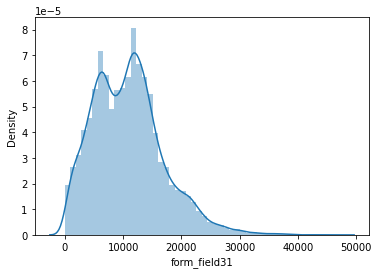

In [ ]:
#checking for outliers
import seaborn as sns
sns.distplot(train_data['form_field31'])

In [ ]:
train_data['default_status'] = train_data['default_status'].map({'yes':1, 'no':0})

In [ ]:
y = train_data['default_status']
train_data.drop('default_status', axis = 1, inplace = True)

In [ ]:
train_data.isnull().sum()

form_field1      2529
form_field2      3844
form_field3       355
form_field4       355
form_field5       355
form_field6     13360
form_field7      5163
form_field8     13360
form_field9      8008
form_field10      355
form_field11    31421
form_field12     9895
form_field13     5889
form_field14        0
form_field15    22475
form_field16    13036
form_field17    11151
form_field18    10402
form_field19        4
form_field20      355
form_field21    15854
form_field22    20400
form_field23    28123
form_field24    13297
form_field25     5450
form_field26     7438
form_field27     9299
form_field28      355
form_field29      355
form_field30    25509
form_field31    39408
form_field32     5450
form_field33     1256
form_field34      355
form_field35    23148
form_field36     1995
form_field37     5450
form_field38      355
form_field39     4211
form_field40    43729
form_field41    38229
form_field42     1323
form_field43      568
form_field44     5383
form_field45    31317
form_field

In [ ]:
train_data = train_data.fillna(-999)

In [ ]:
train_data.isnull().sum()

form_field1     0
form_field2     0
form_field3     0
form_field4     0
form_field5     0
form_field6     0
form_field7     0
form_field8     0
form_field9     0
form_field10    0
form_field11    0
form_field12    0
form_field13    0
form_field14    0
form_field15    0
form_field16    0
form_field17    0
form_field18    0
form_field19    0
form_field20    0
form_field21    0
form_field22    0
form_field23    0
form_field24    0
form_field25    0
form_field26    0
form_field27    0
form_field28    0
form_field29    0
form_field30    0
form_field31    0
form_field32    0
form_field33    0
form_field34    0
form_field35    0
form_field36    0
form_field37    0
form_field38    0
form_field39    0
form_field40    0
form_field41    0
form_field42    0
form_field43    0
form_field44    0
form_field45    0
form_field46    0
form_field47    0
form_field48    0
form_field49    0
form_field50    0
dtype: int64

In [ ]:
train_data.describe()

,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50
count,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,5.600000e+04,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,56000.000000,5.600000e+04,56000.000000,5.600000e+04
mean,3288.988125,-68.061282,-5.287392,-5.486368,-4.389031,4.752342e+05,6.232170e+06,1.999799e+06,1.127799e+07,1.178069e+07,9.012758e+05,2.281290e+06,5.377829e+06,6.914875e+07,6.854873e+07,-232.376143,-198.713089,-185.342911,0.877375,-5.307893,-220.812531,3849.793985,2710.570025,-157.477512,2271.906295,8631.499232,4996.671982,17158.475375,16407.492000,2383.457375,2513.931054,749.800107,-8.791913,-6.104161,-412.826536,-23.188411,-89.569000,2.213946,-75.037214,-747.707893,-647.668167,-23.241859,-3.565496,-95.519653,-558.640946,-283.647714,1.910105e+05,-5.290536,4.818161e+05
std,950.560828,252.735737,79.400587,79.418227,80.131613,1.278889e+06,1.833216e+07,3.605357e+06,1.888158e+07,2.662648e+07,3.410960e+06,4.257190e+06,2.217339e+07,2.713995e+09,1.054537e+08,422.285716,399.053095,388.625626,8.627427,79.390025,491.120212,5817.699466,5503.049115,604.910786,2153.183593,9016.988065,5603.041057,26884.391711,9735.285958,3858.394906,6336.743816,1146.612131,150.740001,79.309402,492.046373,187.842975,298.746289,80.364466,263.470948,474.850472,515.718136,151.783727,100.964839,294.636580,496.023149,450.532984,1.313103e+06,79.391884,5.239461e+06
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,-9.990000e+02,0.000000e+00,-9.990000e+02,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-9.990000e+02,-999.000000,-9.990000e+02
25%,3336.000000,0.047700,0.000000,0.000000,0.000000,0.000000e+00,3.248150e+05,0.000000e+00,4.217732e+05,4.170080e+05,-9.990000e+02,1.205900e+04,0.000000e+00,1.657646e+07,-9.990000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,0.000000,889.500000,1734.000000,730.000000,60.000000,9672.000000,-999.000000,-999.000000,112.000000,2.166600,0.000000,-999.000000,6.000000,0.000000,4.000000,0.000000,-999.000000,-999.000000,0.000000,2.020000,0.349148,-999.000000,-999.000000,-9.990000e+02,0.000000,7.502524e-03
50%,3474.000000,0.226700,0.060000,0.000000,0.000000,4.006700e+04,2.174704e+06,3.765520e+05,3.712227e+06,3.641234e+06,-9.990000e+02,7.037010e+05,1.160776e+06,2.814143e+07,3.854990e+07,0.000000,0.000000,0.000000,0.000000,0.000000,50.775000,596.362500,-999.000000,29.835000,1987.500000,6480.000000,3528.000000,426.000000,14964.000000,670.000000,-999.000000,488.000000,7.333400,0.000000,0.000000,10.000000,4.000000,6.000000,0.00

In [ ]:
new_train = pd.get_dummies(train_data)

In [ ]:
from sklearn.model_selection import train_test_split
train_x, valid_x, train_y, valid_y = train_test_split(new_train,y,test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaled_train = pd.DataFrame(scaler.fit_transform(train_x.drop(['form_field47_charge', 'form_field47_lending'], axis = 1)), columns = train_x.drop(['form_field47_charge', 'form_field47_lending'], axis = 1).columns)
scaled_valid = pd.DataFrame(scaler.transform(valid_x.drop(['form_field47_charge', 'form_field47_lending'], axis = 1)), columns = valid_x.drop(['form_field47_charge', 'form_field47_lending'], axis = 1).columns)

In [ ]:
scaled_train.index = train_x.index
scaled_valid.index = valid_x.index

In [ ]:
scaled_train['form_field47_charge'] = train_x['form_field47_charge']
scaled_valid['form_field47_charge'] = valid_x['form_field47_charge']

In [ ]:
scaled_train['form_field47_lending'] = train_x['form_field47_lending']
scaled_valid['form_field47_lending'] = valid_x['form_field47_lending']

In [ ]:
scaled_train = scaled_train.reset_index()
scaled_valid = scaled_valid.reset_index()

In [ ]:
scaled_valid.head()

,Applicant_ID,form_field1,form_field2,form_field3,form_field4,form_field5,form_field6,form_field7,form_field8,form_field9,form_field10,form_field11,form_field12,form_field13,form_field14,form_field15,form_field16,form_field17,form_field18,form_field19,form_field20,form_field21,form_field22,form_field23,form_field24,form_field25,form_field26,form_field27,form_field28,form_field29,form_field30,form_field31,form_field32,form_field33,form_field34,form_field35,form_field36,form_field37,form_field38,form_field39,form_field40,form_field41,form_field42,form_field43,form_field44,form_field45,form_field46,form_field48,form_field49,form_field50,form_field47_charge,form_field47_lending
0,Apcnt_1057120,0.927332,0.982656,0.945690,0.937060,0.710148,0.000132,0.000349,0.007269,0.001208,0.000002,0.000000,0.006054,4.064569e-07,0.000043,0.000000,0.989109,0.979412,0.979412,0.973710,0.972763,0.363110,0.086217,0.086217,0.067158,0.051394,0.017126,0.027136,1.000000,0.027952,0.000000,0.000000,0.046133,0.868086,0.983268,0.990089,0.834862,0.904072,0.868398,0.985207,0.000000,0.000000,0.000000,0.916675,0.999607,0.00000,0.000000,0.000021,0.973710,0.000005,0,1
1,Apcnt_1110944,0.886099,0.982702,0.946600,0.937060,0.710148,0.001156,0.000086,0.001795,0.002773,0.000200,0.005542,0.004257,7.819437e-04,0.000090,0.000000,0.989109,0.979412,0.979412,0.974684,0.973735,0.370734,0.093697,0.101919,0.067042,0.059615,0.067493,0.045334,0.018148,0.153418,0.000000,0.000000,0.050258,0.870403,0.983268,0.990089,0.848207,0.905882,0.880519,0.985207,0.000000,0.000000,0.998552,0.918527,0.999634,0.00000,0.000000,0.000020,0.973729,0.000005,1,0
2,Apcnt_994748,0.908553,0.983662,0.950408,0.937060,0.710148,0.005355,0.002007,0.001869,0.001509,0.003174,0.033177,0.000870,3.992469e-04,0.000125,0.000000,0.989109,0.979412,0.979412,0.972736,0.971790,0.356662,0.010173,0.010173,0.060412,0.067433,0.061354,0.077457,0.016173,0.185095,0.360729,0.282693,0.049271,0.868231,0.983268,0.990089,0.848207,0.905882,0.875325,0.985207,0.708292,0.890920,0.998198,0.923156,0.999871,0.00000,0.995020,0.002029,0.972736,0.000005,1,0
3,Apcnt_1238192,0.964483,0.000000,0.945690,0.937060,0.710148,0.011306,0.001717,0.025410,0.023724,0.005825,0.000088,0.003150,5.086114e-04,0.000125,0.024978,0.989109,0.979412,0.979412,0.972736,0.971790,0.339744,0.000000,0.000000,0.059099,0.135786,0.144923,0.172537,0.017144,0.143687,0.143019,0.163090,0.064784,0.868086,0.983268,0.000000,0.844871,0.905882,0.866667,0.985207,0.641886,0.828242,0.997881,0.926859,0.999701,0.00000,0.995020,0.000000,0.972736,0.000000,0,1
4,Apcnt_937060,0.915493,0.982366,0.947646,0.951391,0.710148,0.001099,0.000054,0.000362,0.001894,0.000070,0.000086,0.000491,9.900867e-05,0.000040,0.000000,0.989109,0.979412,0.979412,0.972736,0.971790,0.369309,0.010173,0.010173,0.060933,0.112619,0.092091,0.112428,0.017144,0.373874,0.122377,0.075805,0.052410,0.868375,0.983268,0.000000,0.839867,0.905882,0.866667,0.985207,0.698714,0.000000,0.998022,0.918527,0.999996,0.99502,0.996016,0.001145,0.972736,0.000005,0,1


In [ ]:
scaled_train.drop('Applicant_ID',axis = 1, inplace = True)
scaled_valid.drop('Applicant_ID',axis = 1, inplace = True)

In [ ]:
pip install catboost

     |████████████████████████████████| 66.1MB 41kB/s 


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
model_1 = CatBoostClassifier(iterations = 1500, learning_rate = 0.03, depth = 4)

In [ ]:
model_1.fit(scaled_train,train_y)

0:	learn: 0.6756103	total: 76.2ms	remaining: 1m 54s
1:	learn: 0.6592686	total: 101ms	remaining: 1m 15s
2:	learn: 0.6436080	total: 125ms	remaining: 1m 2s
3:	learn: 0.6295308	total: 149ms	remaining: 55.6s
4:	learn: 0.6160146	total: 172ms	remaining: 51.5s
5:	learn: 0.6039587	total: 196ms	remaining: 48.9s
6:	learn: 0.5935924	total: 220ms	remaining: 46.8s
7:	learn: 0.5832795	total: 245ms	remaining: 45.6s
8:	learn: 0.5732182	total: 269ms	remaining: 44.5s
9:	learn: 0.5635179	total: 295ms	remaining: 44s
10:	learn: 0.5554797	total: 319ms	remaining: 43.1s
11:	learn: 0.5481719	total: 341ms	remaining: 42.3s
12:	learn: 0.5409044	total: 365ms	remaining: 41.8s
13:	learn: 0.5340981	total: 389ms	remaining: 41.2s
14:	learn: 0.5274127	total: 413ms	remaining: 40.8s
15:	learn: 0.5211457	total: 436ms	remaining: 40.4s
16:	learn: 0.5158789	total: 461ms	remaining: 40.2s
17:	learn: 0.5109955	total: 483ms	remaining: 39.8s
18:	learn: 0.5060398	total: 510ms	remaining: 39.8s
19:	learn: 0.5021530	total: 534ms	remain

In [ ]:
prediction_1 = model_1.predict_proba(scaled_valid)[:,1]

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
accuracy = roc_auc_score(valid_y, prediction_1)
accuracy

0.8380556488114891

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
model_3 = LGBMClassifier()
model_3.fit(scaled_train, train_y)
prediction_3 = model_3.predict_proba(scaled_valid)[:,1]

In [ ]:
accuracy_3= roc_auc_score(valid_y, prediction_3)
accuracy_3

0.8330521978112634

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_4 = RandomForestClassifier(n_estimators = 500,
                                 criterion = 'gini',
                                 max_depth = 15)
model_4.fit(scaled_train, train_y)
prediction_4 = model_4.predict_proba(scaled_valid)[:,1]

In [ ]:
accuracy_4= roc_auc_score(valid_y, prediction_4)
accuracy_4

0.8329147092328236

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
hyperparameter_grid = {'n_estimators': [100, 200, 250, 300, 400, 500, 700],      
                                     'max_depth': [1, 2, 5, 7, 11, 15],       
                                     'criterion': ['gini', 'entropy']}

In [ ]:
best_split = RandomizedSearchCV(model_4, hyperparameter_grid, n_iter=10, 
                                cv = 5, n_jobs = 1, verbose = 10, scoring = 'accuracy', random_state = 0)

In [ ]:
best_split.fit(scaled_train, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=250, max_depth=11, criterion=gini ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=250, max_depth=11, criterion=gini, score=0.807, total=  23.8s
[CV] n_estimators=250, max_depth=11, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   23.8s remaining:    0.0s


[CV]  n_estimators=250, max_depth=11, criterion=gini, score=0.806, total=  24.0s
[CV] n_estimators=250, max_depth=11, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   47.8s remaining:    0.0s


[CV]  n_estimators=250, max_depth=11, criterion=gini, score=0.806, total=  23.7s
[CV] n_estimators=250, max_depth=11, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s


[CV]  n_estimators=250, max_depth=11, criterion=gini, score=0.803, total=  23.5s
[CV] n_estimators=250, max_depth=11, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.6min remaining:    0.0s


[CV]  n_estimators=250, max_depth=11, criterion=gini, score=0.805, total=  23.5s
[CV] n_estimators=500, max_depth=15, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.0min remaining:    0.0s


[CV]  n_estimators=500, max_depth=15, criterion=gini, score=0.811, total=  59.3s
[CV] n_estimators=500, max_depth=15, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  3.0min remaining:    0.0s


[CV]  n_estimators=500, max_depth=15, criterion=gini, score=0.806, total=  59.2s
[CV] n_estimators=500, max_depth=15, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  4.0min remaining:    0.0s


[CV]  n_estimators=500, max_depth=15, criterion=gini, score=0.808, total=  59.8s
[CV] n_estimators=500, max_depth=15, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  5.0min remaining:    0.0s


[CV]  n_estimators=500, max_depth=15, criterion=gini, score=0.807, total=  59.2s
[CV] n_estimators=500, max_depth=15, criterion=gini ..................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  5.9min remaining:    0.0s


[CV]  n_estimators=500, max_depth=15, criterion=gini, score=0.808, total=  58.9s
[CV] n_estimators=200, max_depth=1, criterion=entropy ................
[CV]  n_estimators=200, max_depth=1, criterion=entropy, score=0.754, total=   3.4s
[CV] n_estimators=200, max_depth=1, criterion=entropy ................
[CV]  n_estimators=200, max_depth=1, criterion=entropy, score=0.754, total=   3.3s
[CV] n_estimators=200, max_depth=1, criterion=entropy ................
[CV]  n_estimators=200, max_depth=1, criterion=entropy, score=0.754, total=   3.3s
[CV] n_estimators=200, max_depth=1, criterion=entropy ................
[CV]  n_estimators=200, max_depth=1, criterion=entropy, score=0.754, total=   3.3s
[CV] n_estimators=200, max_depth=1, criterion=entropy ................
[CV]  n_estimators=200, max_depth=1, criterion=entropy, score=0.754, total=   3.3s
[CV] n_estimators=200, max_depth=2, criterion=entropy ................
[CV]  n_estimators=200, max_depth=2, criterion=entropy, score=0.754, total=   

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 13.8min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
 best_parameters = best_split.best_estimator_.get_params()     
 for param_name in sorted(hyperparameter_grid.keys()):
   print(f'\t{param_name}: {best_parameters[param_name]}') 

	criterion: gini
	max_depth: 15
	n_estimators: 500


In [ ]:
!pip install rgf_python

     |████████████████████████████████| 768kB 5.4MB/s 


In [ ]:
from rgf.sklearn import RGFClassifier

In [ ]:
model_5 = RGFClassifier()
model_5.fit(scaled_train, train_y)
prediction_5 = model_5.predict_proba(scaled_valid)[:,1]

In [ ]:
accuracy_5 = roc_auc_score(valid_y, prediction_5)
accuracy_5

0.8361687792681551

In [ ]:
parameters = {'max_leaf':[100,200,300,400,500,800,900,1000],
 'l2':[0.1,0.2,0.3],
 'min_samples_leaf':[5,10]}

In [ ]:
best_split = RandomizedSearchCV(model_5, parameters, n_iter=10, 
                                cv = 5, n_jobs = 1, verbose = 10, scoring = 'accuracy', random_state = 0)

In [ ]:
best_split.fit(scaled_train, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] min_samples_leaf=10, max_leaf=900, l2=0.2 .......................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  min_samples_leaf=10, max_leaf=900, l2=0.2, score=0.807, total=  34.2s
[CV] min_samples_leaf=10, max_leaf=900, l2=0.2 .......................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   34.2s remaining:    0.0s


[CV]  min_samples_leaf=10, max_leaf=900, l2=0.2, score=0.809, total=  33.5s
[CV] min_samples_leaf=10, max_leaf=900, l2=0.2 .......................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s


[CV]  min_samples_leaf=10, max_leaf=900, l2=0.2, score=0.810, total=  33.0s
[CV] min_samples_leaf=10, max_leaf=900, l2=0.2 .......................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.7min remaining:    0.0s


[CV]  min_samples_leaf=10, max_leaf=900, l2=0.2, score=0.803, total=  32.0s
[CV] min_samples_leaf=10, max_leaf=900, l2=0.2 .......................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  2.2min remaining:    0.0s


[CV]  min_samples_leaf=10, max_leaf=900, l2=0.2, score=0.813, total=  32.2s
[CV] min_samples_leaf=5, max_leaf=300, l2=0.1 ........................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.7min remaining:    0.0s


[CV]  min_samples_leaf=5, max_leaf=300, l2=0.1, score=0.806, total=  11.1s
[CV] min_samples_leaf=5, max_leaf=300, l2=0.1 ........................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.9min remaining:    0.0s


[CV]  min_samples_leaf=5, max_leaf=300, l2=0.1, score=0.808, total=  11.0s
[CV] min_samples_leaf=5, max_leaf=300, l2=0.1 ........................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  3.1min remaining:    0.0s


[CV]  min_samples_leaf=5, max_leaf=300, l2=0.1, score=0.809, total=  10.9s
[CV] min_samples_leaf=5, max_leaf=300, l2=0.1 ........................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.3min remaining:    0.0s


[CV]  min_samples_leaf=5, max_leaf=300, l2=0.1, score=0.802, total=  11.0s
[CV] min_samples_leaf=5, max_leaf=300, l2=0.1 ........................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.5min remaining:    0.0s


[CV]  min_samples_leaf=5, max_leaf=300, l2=0.1, score=0.810, total=  11.1s
[CV] min_samples_leaf=5, max_leaf=800, l2=0.2 ........................
[CV]  min_samples_leaf=5, max_leaf=800, l2=0.2, score=0.807, total=  28.0s
[CV] min_samples_leaf=5, max_leaf=800, l2=0.2 ........................
[CV]  min_samples_leaf=5, max_leaf=800, l2=0.2, score=0.809, total=  27.8s
[CV] min_samples_leaf=5, max_leaf=800, l2=0.2 ........................
[CV]  min_samples_leaf=5, max_leaf=800, l2=0.2, score=0.809, total=  28.4s
[CV] min_samples_leaf=5, max_leaf=800, l2=0.2 ........................
[CV]  min_samples_leaf=5, max_leaf=800, l2=0.2, score=0.803, total=  27.7s
[CV] min_samples_leaf=5, max_leaf=800, l2=0.2 ........................
[CV]  min_samples_leaf=5, max_leaf=800, l2=0.2, score=0.811, total=  28.0s
[CV] min_samples_leaf=5, max_leaf=1000, l2=0.2 .......................
[CV]  min_samples_leaf=5, max_leaf=1000, l2=0.2, score=0.807, total=  35.7s
[CV] min_samples_leaf=5, max_leaf=1000, l2=0.2 .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 15.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RGFClassifier(algorithm='RGF', calc_prob='sigmoid',
                                           init_model=None, l2=0.1,
                                           learning_rate=0.5, loss='Log',
                                           max_leaf=1000,
                                           memory_policy='generous',
                                           min_samples_leaf=10, n_iter=None,
                                           n_jobs=-1, n_tree_search=1,
                                           normalize=False, opt_interval=100,
                                           reg_depth=1.0, sl2=None,
                                           test_interval=100, verbose=0),
                   iid='deprecated', n_iter=10, n_jobs=1,
                   param_distributions={'l2': [0.1, 0.2, 0.3],
                                        'max_leaf': [100, 200, 300, 400, 500,
                                         

In [ ]:
best_parameters = best_split.best_estimator_.get_params()     
for param_name in sorted(parameters.keys()):
  print(f'\t{param_name}: {best_parameters[param_name]}') 

	l2: 0.1
	max_leaf: 800
	min_samples_leaf: 5


In [ ]:
new_train = new_train.reset_index()

In [ ]:
new_train.drop('Applicant_ID', axis = 1, inplace = True)

In [ ]:
test_data.isnull().sum()

form_field1      1110
form_field2      1709
form_field3       146
form_field4       146
form_field5       146
form_field6      5604
form_field7      2231
form_field8      5604
form_field9      3400
form_field10      147
form_field11    13398
form_field12     4183
form_field13     2463
form_field14        0
form_field15     9592
form_field16     5474
form_field17     4695
form_field18     4369
form_field19        0
form_field20      147
form_field21     6707
form_field22     8724
form_field23    12125
form_field24     5605
form_field25     2256
form_field26     3172
form_field27     3910
form_field28      147
form_field29      147
form_field30    10908
form_field31    16810
form_field32     2256
form_field33      495
form_field34      147
form_field35     9866
form_field36      903
form_field37     2256
form_field38      147
form_field39     1829
form_field40    18828
form_field41    16349
form_field42      578
form_field43      250
form_field44     2362
form_field45    13538
form_field

In [ ]:
test_data = test_data.fillna(-999)

In [ ]:
test_data.isnull().sum()

form_field1     0
form_field2     0
form_field3     0
form_field4     0
form_field5     0
form_field6     0
form_field7     0
form_field8     0
form_field9     0
form_field10    0
form_field11    0
form_field12    0
form_field13    0
form_field14    0
form_field15    0
form_field16    0
form_field17    0
form_field18    0
form_field19    0
form_field20    0
form_field21    0
form_field22    0
form_field23    0
form_field24    0
form_field25    0
form_field26    0
form_field27    0
form_field28    0
form_field29    0
form_field30    0
form_field31    0
form_field32    0
form_field33    0
form_field34    0
form_field35    0
form_field36    0
form_field37    0
form_field38    0
form_field39    0
form_field40    0
form_field41    0
form_field42    0
form_field43    0
form_field44    0
form_field45    0
form_field46    0
form_field47    0
form_field48    0
form_field49    0
form_field50    0
dtype: int64

In [ ]:
new_test = pd.get_dummies(test_data)

In [ ]:
new_test = new_test.reset_index()

In [ ]:
new_test.drop('Applicant_ID', axis = 1, inplace = True)

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
pred_test_full = 0
auc = []
i = 1
ensemble_model = VotingClassifier(estimators = [('first_boost', CatBoostClassifier(iterations = 1500, learning_rate = 0.03, 
                                                                                   depth = 4, eval_metric='AUC')),
                                                ('second_boost', CatBoostClassifier(eval_metric = 'AUC')),
                                                ('regularised_forest', RGFClassifier()),
                                                ('random_forest', RandomForestClassifier(n_estimators = 500,criterion = 'gini', n_jobs = -1))], voting = 'soft')
                                              
skf = StratifiedKFold(n_splits=25, shuffle=True)
for train_index,test_index in skf.split(new_train, y):
    pipe_model = Pipeline([('scaler', MinMaxScaler()), ('model', ensemble_model)])
    X_train, X_test = new_train.loc[train_index],new_train.loc[test_index]
    Y_train, Y_test  = y.iloc[train_index], y.iloc[test_index]
    fit_model = pipe_model.fit(X_train, Y_train)
    auc.append(roc_auc_score(Y_test, fit_model.predict(X_test)))
    pred_test = fit_model.predict_proba(new_test)[:,1]
    pred_test_full +=pred_test
    i+=1

Streaming output truncated to the last 5000 lines.
3:	total: 123ms	remaining: 45.8s
4:	total: 150ms	remaining: 44.9s
5:	total: 178ms	remaining: 44.2s
6:	total: 218ms	remaining: 46.4s
7:	total: 251ms	remaining: 46.8s
8:	total: 281ms	remaining: 46.6s
9:	total: 310ms	remaining: 46.2s
10:	total: 338ms	remaining: 45.7s
11:	total: 367ms	remaining: 45.5s
12:	total: 394ms	remaining: 45.1s
13:	total: 424ms	remaining: 45s
14:	total: 454ms	remaining: 45s
15:	total: 485ms	remaining: 45s
16:	total: 512ms	remaining: 44.6s
17:	total: 539ms	remaining: 44.4s
18:	total: 566ms	remaining: 44.1s
19:	total: 593ms	remaining: 43.9s
20:	total: 622ms	remaining: 43.8s
21:	total: 651ms	remaining: 43.7s
22:	total: 686ms	remaining: 44s
23:	total: 713ms	remaining: 43.9s
24:	total: 741ms	remaining: 43.7s
25:	total: 769ms	remaining: 43.6s
26:	total: 800ms	remaining: 43.7s
27:	total: 828ms	remaining: 43.6s
28:	total: 856ms	remaining: 43.4s
29:	total: 884ms	remaining: 43.3s
30:	total: 915ms	remaining: 43.4s
31:	total: 9

In [ ]:
np.mean(auc)

0.6855787000202588

In [ ]:
stratified_prediction = pred_test_full/25

In [ ]:
output = pd.DataFrame({
    'Applicant_ID': test_data.index,
    'default_status':stratified_prediction})

In [ ]:
output.to_csv('submission_V.csv', index = False)

In [ ]:
pd.read_csv('submission_V.csv')

,Applicant_ID,default_status
0,Apcnt_1000032,0.321167
1,Apcnt_1000048,0.344947
2,Apcnt_1000052,0.396244
3,Apcnt_1000076,0.733019
4,Apcnt_1000080,0.189723
...,...,...
23995,Apcnt_999940,0.655963
23996,Apcnt_999956,0.282584
23997,Apcnt_999976,0.273420
23998,Apcnt_999984,0.513592
